<a href="https://colab.research.google.com/github/sanchanapradeep/aiml/blob/master/Unsupervised_Learning_R4_Project1_Car_mpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import os
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
drive.mount("/content/drive")
%matplotlib inline

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv("/content/drive/My Drive/cloud_ML/cars-dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [0]:
# Pre-processing
# We could see "?" values in column, this should be removed from data set
df_mod = df.drop(df[df['hp'] == '?'].index  )
#Convert the Column as type to Int
df_mod['hp'] = df_mod['hp'].astype('int')
df_mod = df_mod.drop('car name', axis=1)
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
cyl     392 non-null int64
disp    392 non-null float64
hp      392 non-null int64
wt      392 non-null int64
acc     392 non-null float64
yr      392 non-null int64
mpg     392 non-null float64
dtypes: float64(3), int64(4)
memory usage: 24.5 KB


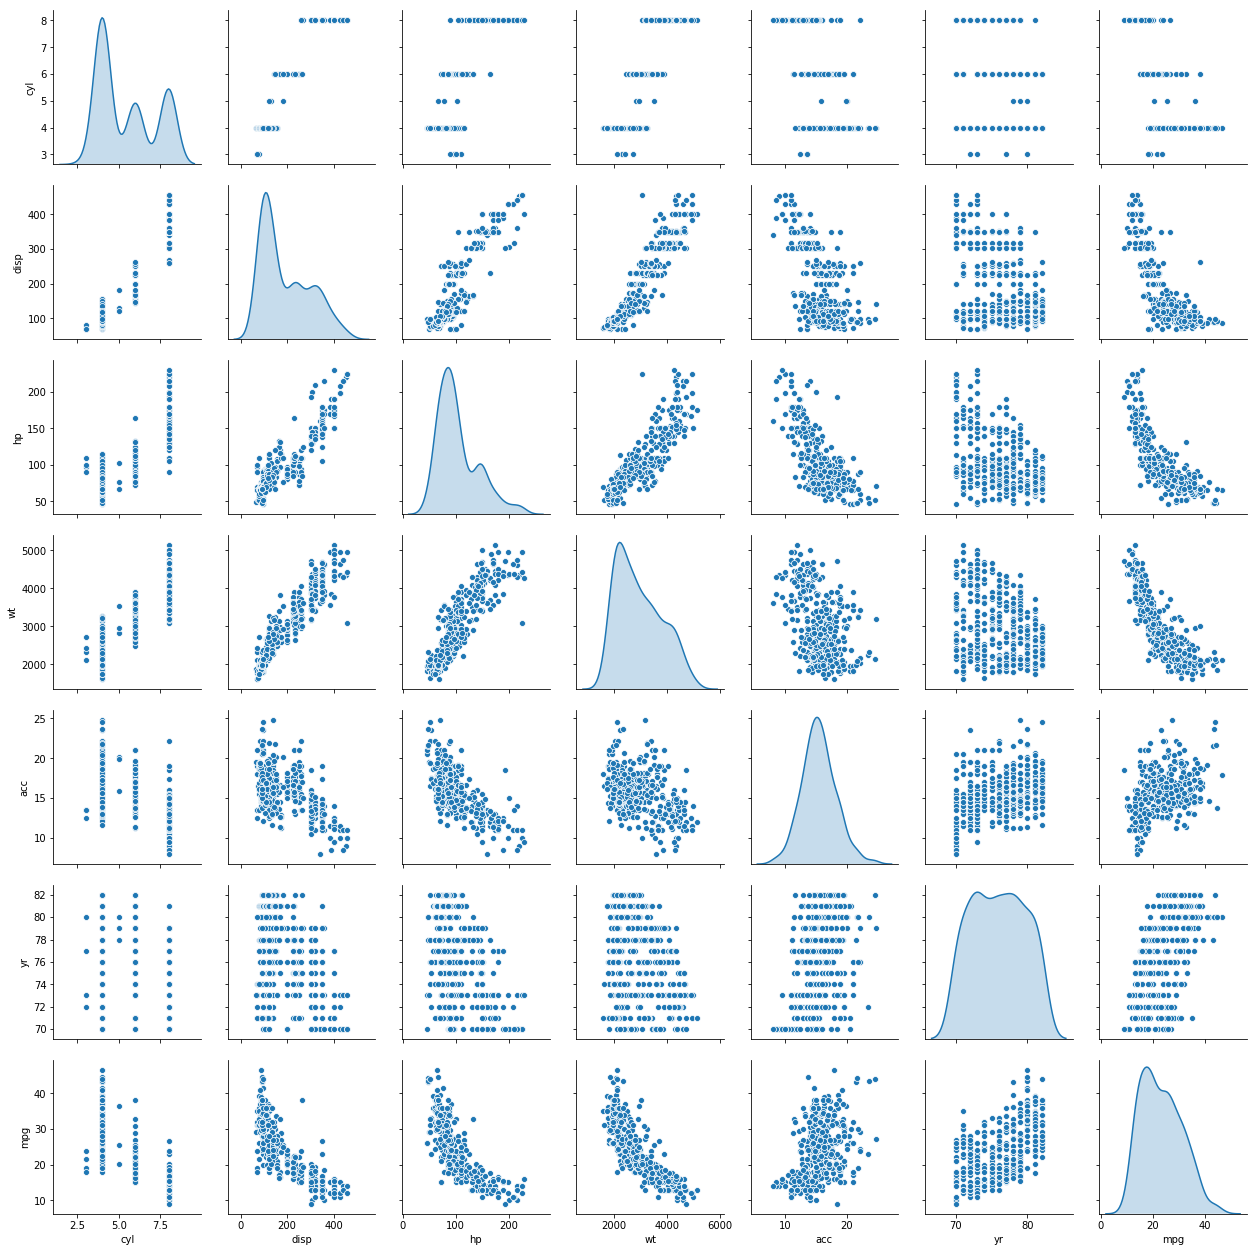

In [0]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.pairplot(df_mod,diag_kind='kde') 

In [0]:
##Use K Means or Hierarchical clustering to find out the optimal number of clusters in the data. Identify and separate the clusters (10 points)
from sklearn.cluster import KMeans
from scipy.stats import zscore
df_z = df_mod.apply(zscore)
df_z.head()
# Let us check optimal number of clusters-
cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2744.000000
1,2,1272.900760
2,3,928.617487
3,4,725.349462
4,5,654.758513
5,6,584.733652
6,7,536.620106
7,8,492.963143
8,9,457.914064


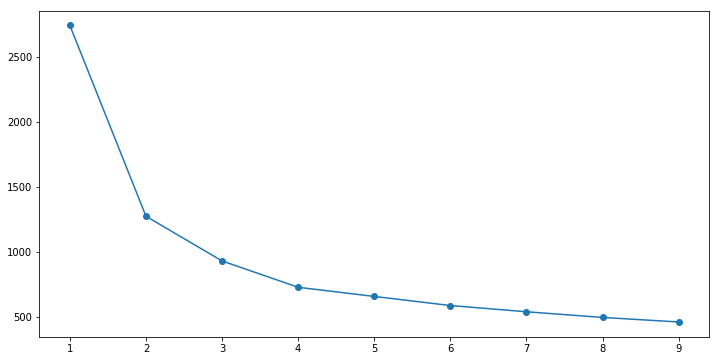

In [0]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [0]:
final_model=KMeans(3,random_state = 9)
final_model.fit(df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=0)

In [0]:
centroids = final_model.cluster_centers_
centroids.shape


(3, 8)

In [0]:
centroid_df = pd.DataFrame(centroids, columns = list(df_z.columns))
centroid_df

,cyl,disp,hp,wt,acc,yr,mpg,GROUP
0,0.347040,0.238491,-0.044248,0.303356,0.292920,0.011269,-0.472584,0.0
1,1.483947,1.485912,1.499293,1.387382,-1.065971,-0.666826,-1.151558,2.0
2,-0.861108,-0.810982,-0.684304,-0.795149,0.363564,0.308306,0.763829,1.0


In [0]:
prediction = final_model.predict(df_z)
df_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record
df_z

,cyl,disp,hp,wt,acc,yr,mpg,GROUP
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.698638,1
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-1.083498,1
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.698638,1
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.955212,1
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.826925,1
5,1.483947,2.244637,2.433030,1.607198,-2.011120,-1.625315,-1.083498,1
6,1.483947,2.483848,3.005320,1.622523,-2.374052,-1.625315,-1.211785,1
7,1.483947,2.349890,2.875254,1.573013,-2.555517,-1.625315,-1.211785,1
8,1.483947,2.493416,3.135386,1.706218,-2.011120,-1.625315,-1.211785,1
9,1.483947,1.871469,2.224924,1.028406,-2.555517,-1.625315,-1.083498,1


In [0]:
##Use linear regression model on different clusters separately and print the coefficients of the models individually (10 points)

#I have devided the 
cluster0 = df_z[df_z['GROUP'] ==0]
cluster1 = df_z[df_z['GROUP'] ==1]
cluster2 = df_z[df_z['GROUP'] ==2]


In [0]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
model = LinearRegression()


In [0]:
def modelCoefficients(cluster): 
	y = cluster['mpg']
	X = cluster.drop(['mpg','GROUP'], axis=1)
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
	model.fit(X_train, y_train)
	return model.coef_


In [0]:
# cluster0 coefficients
modelCoefficients(cluster0)


array([ 0.27185314, -0.13851545, -0.35680717, -0.25883252, -0.1753856 ,
        0.29996823])

In [0]:
# cluster1 coefficients
modelCoefficients(cluster1)

array([ 0.        , -0.1543902 , -0.1418805 ,  0.00045928, -0.29688243,
        0.19286482])

In [0]:
# cluster2 coefficients
modelCoefficients(cluster2)

array([ 1.21203784, -0.41890866, -0.32968715, -0.63768473, -0.05053934,
        0.41573516])